In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
'''Set-Up Initial Conditions'''
def setupSimulation():
    sim = rebound.Simulation()
    sim.integrator = 'ias15'
    sim.units = ('yr','au','solarmass')
    smass = 1.0 #in Solar Mass units
    jmass = 0.000954588 #Jupiter Mass in Solar Mass units
    delta_critical = 2.40*((jmass + jmass)**(1./3.))
    sim.add(m = smass)
    sim.add(m = jmass, a= 1, r = (0.000477895), f = 0, hash="planet1")
    sim.add(m = jmass, a= (1 + delta_critical) - 0.00525684, r = (0.000477895), f = np.pi, hash="planet2")
    sim.move_to_com()
    return sim

3 particles in the simulation at t = 0.0 yr
Protoplanet 1 Semi-Major Axis: 1.0 AU
Protoplanet 2 Semi-Major Axis: 1.2924758791589925 AU
Period of Protoplanet 1: 0.9995419250229012 yr
Period of Protoplanet 2: 1.4680055430286891 yr
True Anomaly of Protoplanet 1: 0.0 radians
True Anomaly of Protoplanet 2: 3.141592653589793 radians


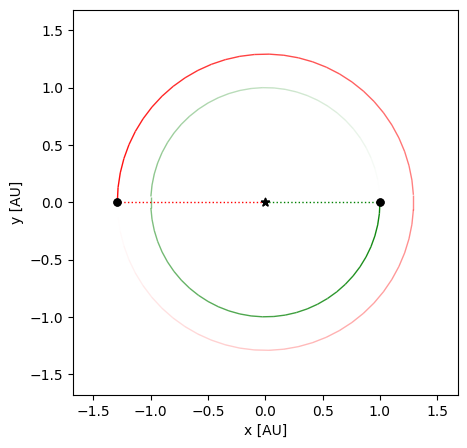

In [3]:
'''Conditions before collision'''
sim = setupSimulation()
tmax = 1e4

period1 = np.array([i.P for i in sim.calculate_orbits()])
omega1 = np.array([i.omega for i in sim.calculate_orbits()])
ecc = np.array([i.e for i in sim.calculate_orbits()])
p1 = period1[0]
p2 = period1[1]
f1 = omega1[0]
f2 = omega1[1]

print(f'{sim.N} particles in the simulation at t = {sim.t} yr')
print(f"Protoplanet 1 Semi-Major Axis: {sim.calculate_orbits()[0].a} AU")
print(f"Protoplanet 2 Semi-Major Axis: {sim.calculate_orbits()[1].a} AU")
print(f'Period of Protoplanet 1: {p1} yr')
print(f'Period of Protoplanet 2: {p2} yr')
print(f"True Anomaly of Protoplanet 1: {f1} radians")
print(f"True Anomaly of Protoplanet 2: {f2} radians")

fig = rebound.OrbitPlot(sim, unitlabel='[AU]', color=['green', 'red'], periastron=True)

In [4]:
'''Collision Resolve Function to count the number of close encounters'''
def close_encounter(sim_pointer, collision):
    global count
    global temp
    sim = sim_pointer.contents
    temp = temp + 1
    count = np.append(count, temp)
    return 0

Number of Close Encounters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


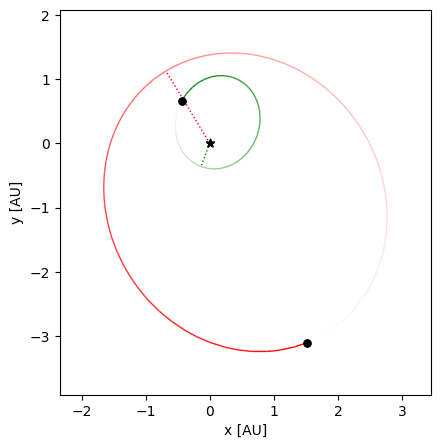

In [5]:
sim = setupSimulation()
temp = 0
count = np.array([0])
sim.collision = "direct"
sim.collision_resolve = close_encounter
sim.integrate(tmax)
print(f"Number of Close Encounters: {count}")
fig = rebound.OrbitPlot(sim, unitlabel='[AU]', color=['green', 'red'], periastron=True)

In [6]:
def my_merge(sim_pointer, collided_particles_index):
    global simulation_time
    sim = sim_pointer.contents 
    ps = sim.particles 
    i = collided_particles_index.p1  
    j = collided_particles_index.p2 

    simulation_time = sim.t
    print(f"First Collision Occurs at time: {simulation_time} yr")
    total_mass = ps[i].m + ps[j].m
    merged_planet = (ps[i] * ps[i].m + ps[j] * ps[j].m)/total_mass 
    merged_radius = (ps[i].r**3 + ps[j].r**3)**(1/3)

    ps[i] = merged_planet   
    ps[i].m = total_mass    
    ps[i].r = merged_radius 
    
    return 2

First Collision Occurs at time: 1566.3192654484446 yr


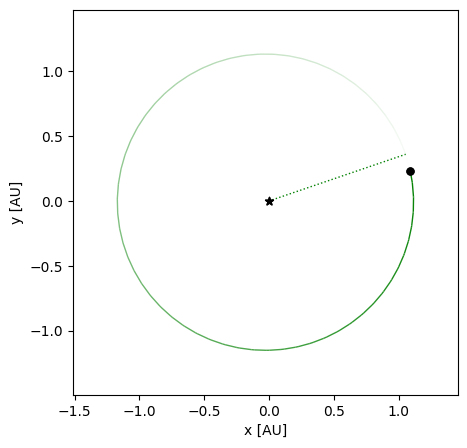

In [7]:
'''Merge Condition'''
sim = setupSimulation()
sim.collision = 'direct'
sim.collision_resolve = my_merge
sim.integrate(tmax)

period2 = np.array([i.P for i in sim.calculate_orbits()])
eccentricity = np.array([i.e for i in sim.calculate_orbits()])

fig = rebound.OrbitPlot(sim, unitlabel='[AU]', color=['green', 'red'], periastron=True)

<0.6636929521814435, -0.902823699685781>
<0.6897298091501602, -0.9120090216320601>
Eccentricity of Orbit 1: 0.1736598689043301
Eccentricity of Orbit 2: 0.18500150169426582
SMA of Orbit 1: 1.2991626336735744
SMA of Orbit 2: 1.0655578418140372


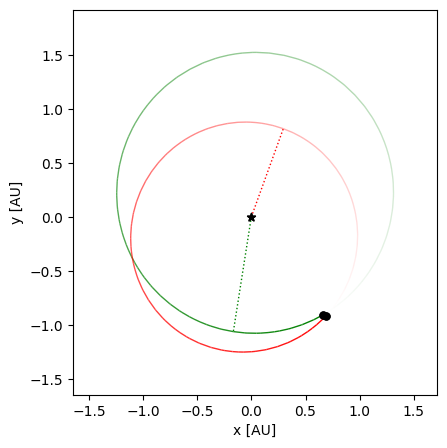

In [8]:
sim = setupSimulation()
sim.integrate(1566.31)
fig = rebound.OrbitPlot(sim, unitlabel='[AU]', color=['green', 'red'], periastron=True)
p1 = sim.particles["planet1"]
p2 = sim.particles["planet2"]
print(f'<{p1.x}, {p1.y}>')
print(f'<{p2.x}, {p2.y}>')
print(f'Eccentricity of Orbit 1: {sim.calculate_orbits()[0].e}')
print(f'Eccentricity of Orbit 2: {sim.calculate_orbits()[1].e}')
print(f'SMA of Orbit 1: {sim.calculate_orbits()[0].a}')
print(f'SMA of Orbit 2: {sim.calculate_orbits()[1].a}')

In [9]:
print(sim.calculate_orbits()[0])
print(sim.calculate_orbits()[1])

<rebound.Orbit instance, a=1.2991626336735744 e=0.1736598689043301 inc=0.0 Omega=0.0 omega=4.55682283918987 f=0.789495658624797>
<rebound.Orbit instance, a=1.0655578418140372 e=0.18500150169426582 inc=0.0 Omega=0.0 omega=1.224212902389203 f=4.135681235485048>


In [10]:
def setupSimulation2():
    sim = rebound.Simulation()
    sim.integrator = 'ias15'
    sim.units = ('yr','au','solarmass')
    smass = 1.0 #in Solar Mass units
    jmass = 0.000954588 #Jupiter Mass in Solar Mass units
    delta_critical = 2.40*((jmass + jmass)**(1./3.))
    sim.add(m = smass)
    sim.add(m = jmass, a= 1.2991626336735744, e=0.1736598689043301, omega=4.55682283918987, r = (0.000477895), f = 0.789495658624797)
    sim.add(m = jmass, a=1.0655578418140372, e=0.18500150169426582, omega=1.224212902389203, f=4.135681235485048, r = 0.000477895)
    sim.move_to_com()
    return sim

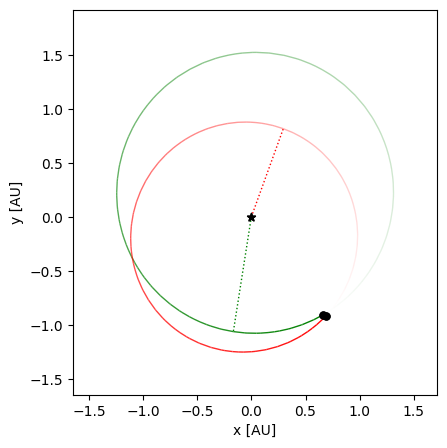

In [11]:
sim = setupSimulation2()
fig = rebound.OrbitPlot(sim, unitlabel='[AU]', color=['green', 'red'], periastron=True)